### Matplotlib Plotting example

#### General imports

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap

#### Graphics-related constants

We first define some constants we will use across the plots

In [134]:
mm = 1 / 25.4     # conversion from millimeters to inches
cm = 1 / 2.54     # conversion from centimeters to inches
pt = 1 / 72.27    # conversion from points to inches

# The values below are obtained from LaTeX, using \the\columnwidth and \the\textwidth
PAPER_COLUMN = 245.71811  # points
PAPER_TEXTWIDTH = 505.89  # points

#### Fonts setup

In [135]:
# To set the font size
plt.rcParams["font.size"] = 8

# To change the font's type to a font we have in our system
plt.rcParams['font.family'] = 'Roboto'

#### Prepare color palette

In [136]:
# This is the default number of colors we'll use
N_COLORS = 10

# We define the color palette
# We'll use the 'colorblind' palette available on seaborn, which is categorical
# We don't define it as a colormap because it will not map continuous values to colors
color_palette = sns.color_palette("colorblind", n_colors=N_COLORS, as_cmap=False)

# These are just some helpers to index the colors 'semantically' when making plots
color_palette_str = [
    "blue",
    "orange",
    "green",
    "red",
    "pink",
    "brown",
    "light_pink",
    "gray",
    "yellow",
    "light_blue",
]
color_palette_from_str = {k: v for k, v in zip(color_palette_str, color_palette)}

We can inspect the colors exploiting the functionalities of Jupyter to plot matplotlib's `ListedColormap`s

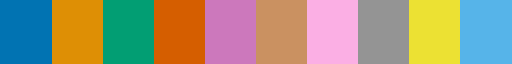

In [137]:
ListedColormap(color_palette)

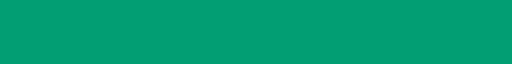

In [138]:
ListedColormap(color_palette_from_str["green"])

Additionally I find it useful to make a 'grey' palette for lines or boxes

In [139]:
grey_palette = sns.color_palette("Greys", n_colors=N_COLORS+2)

# This is a grey palette: 0 means white, 100 means black
# This is arbitrary, you can design it in whatever way you want
# The line below helps indexing "10" as '10% black', while "80" means '80% black
grey_palette_from_str = {f"{p}0": v for p, v in enumerate(grey_palette)}

# The stuff below is just to facilitate semantics
grey_palette_from_str["black"] = grey_palette_from_str["100"]
grey_palette_from_str["white"] = grey_palette_from_str["00"]

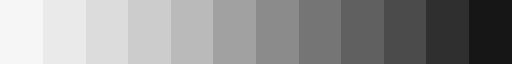

In [140]:
ListedColormap(grey_palette)

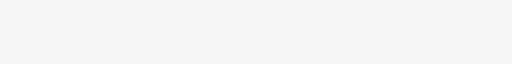

In [141]:
ListedColormap(grey_palette_from_str["00"])

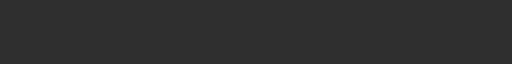

In [142]:
ListedColormap(grey_palette_from_str["black"])

#### Configuring and plotting

'Line2D' object has no attribute 'set_sizes'


Text(0.5, 0, 'Time [s]')

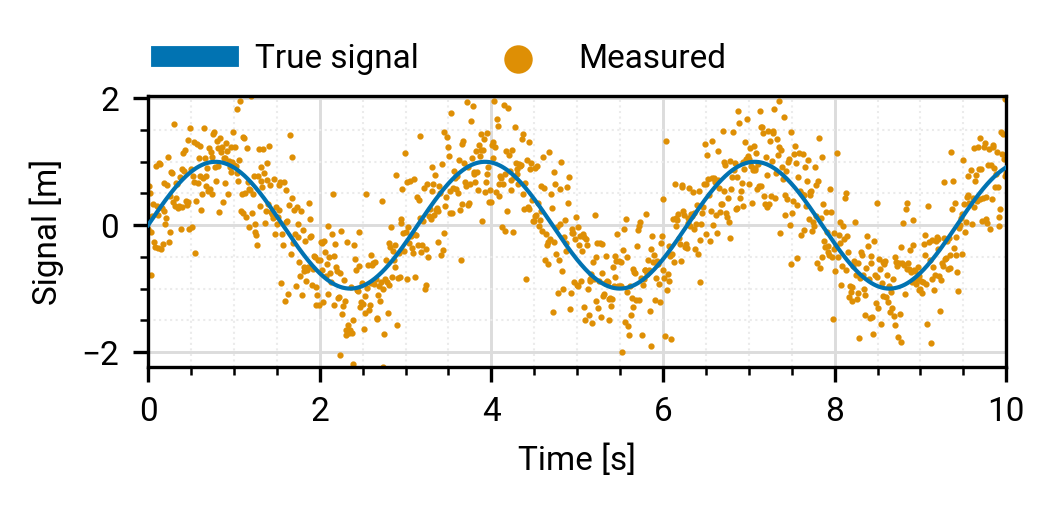

In [143]:

plot_width = PAPER_COLUMN * pt # We use the constant to convert points in inches
plot_height = 4 * cm           # We use this to convert the size to inches, as matplotlib uses
resolution = 300               # 'DPI', but actually PPI


fig, ax = plt.subplots(
    1,     # num of vertical plots
    1,     # num of horizontal plots
    figsize=(plot_width, plot_height), # The size in inches
    dpi=300,  # the resolution in PPI
    constrained_layout=True, 
)

# Axes
ax.set_axisbelow(True)
ax.grid(which="major", color=grey_palette_from_str["20"], linewidth=0.7)
ax.grid(
    which="minor",
    color=grey_palette_from_str["10"],
    linestyle=":",
    linewidth=0.5,
)
ax.minorticks_on()

# Fake data for plotting
N = 1000
t = np.linspace(0, 10, N)
true_signal = np.sin(2*t)
noisy_signal = true_signal + np.random.normal(loc=0, scale=0.5, size=N)

# plot
ax.plot(t, true_signal, 
    label="True signal",
    linewidth=1,
    color=color_palette_from_str["blue"],
    zorder=3 # zorder allows to move the 'layer' of the plot. Higher numbers means 'more to the front'
)
# Plot noisy signal
ax.scatter(t, noisy_signal, 
    label="Measured",
    linewidth=0.5,
    s=1,
    color=color_palette_from_str["orange"],
    zorder=1)

# Legends
# Here we create and move them to place them on top of the plot
lgnd = ax.legend(edgecolor=(1, 1, 1, 0), framealpha=0.9, loc=(0, 1.03), ncol=3)

# This changes the size of the line in the legend
for handle in lgnd.get_lines():
    handle.set_linewidth(5)

# This changes the size of the markers (scatter plot) in the legend
for handle in lgnd.legend_handles:
    try:
        handle.set_sizes([40.0])
    except Exception as e:
        print(e)

ax.margins(x=0, y=0)
ax.set_ylabel("Signal [m]")
ax.set_xlabel("Time [s]")

#### Saving as PDF

In [144]:
# Export
fig.set_tight_layout(True)
fig.savefig("example.pdf")

#### Saving as PNG

In [145]:
# Export
fig.set_tight_layout(True)
fig.savefig("example.png")